# C++ Athlete notebook

This notebook is supposed to visualise my C++ implementation of a simulated athlete. The results should be equivalent to the ones presented in `1 Athlete`. I will use the same plotting routines as in `1 Athlete` to visualise the results.

The C++ implementation is in `streamanalysiscpp/athlete.cpp`. On my Mac, it can be compiled by running `make athlete` in the `streamanalysiscpp` folder. I create the data using the `run_athlete.cpp` script. The data is stored as the CSV file `athlete.out` in the notebooks folder.

## Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set_context('notebook')

In [6]:
import os

## Data generation

I run the C++ script `run_athlete`.

In [21]:
os.system('./../streamanalysiscpp/run_athlete')

0

## Analysis of generated data

I can now look at the positions and velocities of the athlete as stored in the CSV file `athlete.out`.

In [22]:
# Load data from file
data = np.genfromtxt('athlete.out', delimiter = ',', skip_header = 1)

In [23]:
print data.shape

(108001, 4)


Each line of the file contains (x,y)-position and velocity.

In [24]:
print 'Initial data of athlete:'
print 'Position', data[0,:2]
print 'Velocity', data[0,2:]
print 'Final data of athlete:'
print 'Position', data[-1,:2]
print 'Velocity', data[-1,2:]

Initial data of athlete:
Position [ 50.  50.]
Velocity [ 0.  0.]
Final data of athlete:
Position [ 100.       44.7096]
Velocity [ 0.  0.]


In [25]:
# Get positions and velocities from data
d = np.asarray(data)
positions = d[:,:2]
velocities = d[:,2:]

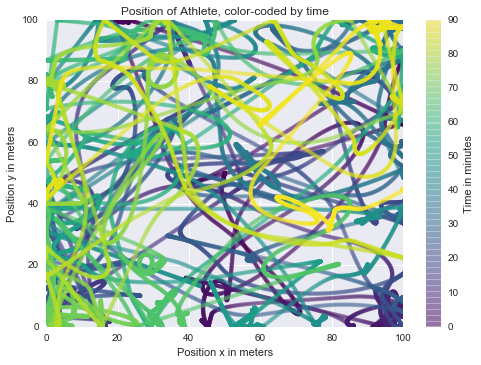

In [26]:
time = np.arange(positions.shape[0]) * (1./20./60.)
plt.scatter(positions[:,0], positions[:,1], c = time, alpha = .3, cmap = 'viridis',edgecolors='none')
plt.xlim(0,100)
plt.xlabel('Position x in meters')
plt.ylim(0,100)
plt.ylabel('Position y in meters')
plt.title('Position of Athlete, color-coded by time')
_=plt.colorbar(label = 'Time in minutes')

This plot shows the positions of the athlete over the full 90 minutes color coded by the ellapsed time (see colorbar). The athlete nicely covers most of the field and the trajectory appears smooth.

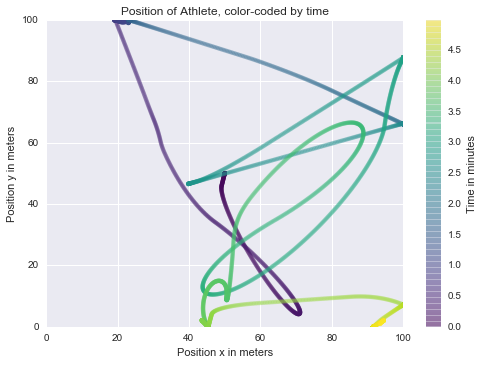

In [27]:
start = 60*20*5
plt.scatter(positions[:start,0], positions[:start,1], c = time[:start], alpha = .3, cmap = 'viridis',edgecolors='none')
plt.xlim(0,100)
plt.xlabel('Position x in meters')
plt.ylim(0,100)
plt.ylabel('Position y in meters')
plt.title('Position of Athlete, color-coded by time')
_=plt.colorbar(label = 'Time in minutes')

This plot is a closer look at the first 5 minutes only.

In [28]:
# Calculate absolute velocities
vs = np.sqrt((velocities**2).sum(axis = 1))

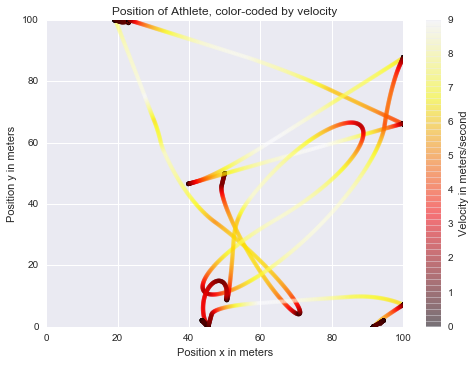

In [29]:
plt.scatter(positions[:start,0], positions[:start,1], c = vs[:start], alpha = .3, cmap = 'hot',edgecolors='none')
plt.xlim(0,100)
plt.xlabel('Position x in meters')
plt.ylim(0,100)
plt.ylabel('Position y in meters')
plt.colorbar(label = 'Velocity in meters/second')
_=plt.title('Position of Athlete, color-coded by velocity')

This plot again shows the positions of the athlete over the first 5 minutes, this time color coded by the velocity of the athlete. The athlete achieves the highest speeds on long, straight trajectories and is slow when it turns around.

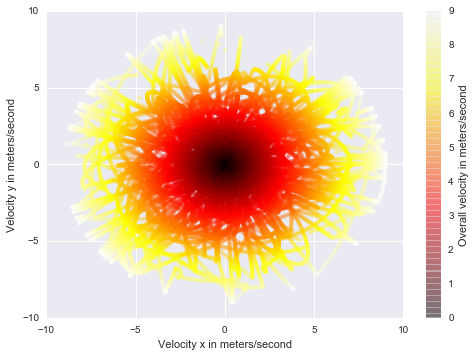

In [30]:
plt.scatter(velocities[:,0], velocities[:,1], c = vs, alpha = .3, cmap = 'hot',edgecolors='none')
plt.xlim(-10,10)
plt.xlabel('Velocity x in meters/second')
plt.ylim(-10,10)
plt.ylabel('Velocity y in meters/second')
_=plt.colorbar(label = 'Overall velocity in meters/second')

Velocities of athlete in x and y direction, color coded by the overall velocity. The athlete does not prefer a particular direction. The nice circular structure of the trace in velocity-space also shows that the maximum speed of the athlete is indeed limited by 9 m/s.

In [31]:
# Calculate the covered distance in kilometers as a function of time
delta_pos = np.sqrt(((positions[1:] - positions[:-1])**2).sum(axis = 1))
distance_covered = np.cumsum(delta_pos)/1000.0

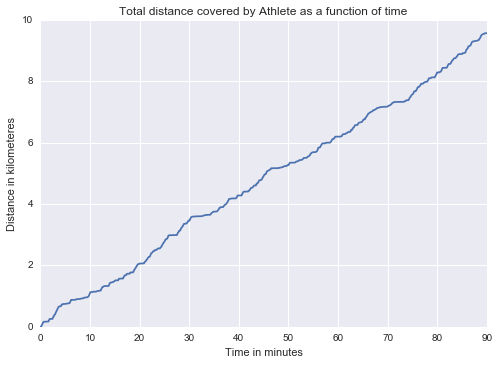

In [32]:
plt.plot(time[1:], distance_covered)
plt.xlabel('Time in minutes')
plt.ylabel('Distance in kilometeres')
_=plt.title('Total distance covered by Athlete as a function of time')

Total distance covered by the athlete as a function of time. At the end of the game, the athlete travelled almost 10 km. This is a bit less than in `1 Athlete`, but that is due to the randomness of the process.